# Basic Training

In this notebook, we'll train some basic Random Forests and look at various hyperparameters.

# Setup

## Imports

In [1]:
from utils import * # Loads all the necessary utilities needed for the competition

## Useful Features

In [2]:
jtplot_style()

Sets the data of the training function for repeated training

In [3]:
def set_data(data):
    global train_model
    from functools import partial
    train_model = partial(train_model, data=data)

## Create Training Set

In [4]:
data = feather.read_dataframe(DIR_DATA / 'train.ft') # Load the preprocessed feather file

`proc_df()` processes the dataframe in many different ways, making it suitable for training and inference.

In this case, it:
* dissociates the dependent variable, `'SalePrice'` and puts it into `y`
* replaces the missing/NA values by the median of the column and stores it into `nas`
* changes categories into numbers

In [5]:
x, y, nas = proc_df(data, 'SalePrice')

In [6]:
x.head().T.show()

0      1      2      3      4
Id                  1      2      3      4      5
MSSubClass         60     20     60     70     60
MSZoning            4      4      4      4      4
LotFrontage        65     80     68     60     84
LotArea          8450   9600  11250   9550  14260
Street              2      2      2      2      2
Alley               0      0      0      0      0
LotShape            4      4      1      1      1
LandContour         4      4      4      4      4
Utilities           1      1      1      1      1
LotConfig           5      3      5      1      3
LandSlope           1      1      1      1      1
Neighborhood        6     25      6      7     16
Condition1          3      2      3      3      3
Condition2          3      3      3      3      3
BldgType            1      1      1      1      1
HouseStyle          6      3      6      6      6
OverallQual         7      6      7      7      8
OverallCond         5      8      5      5      5
YearBuilt        2003   1976   2001   1915   2000
YearRemodAdd     2003   1976   2002   1970   2000
RoofStyle           2      2      2      2      2
RoofMatl            2      2      2      2      2
Exterior1st        13      9     13     14     13
Exterior2nd        14      9     14     16     14
MasVnrType          2      3      2      3      2
MasVnrArea        196      0    162      0    350
ExterQual           3      4      3      4      3
ExterCond           5      5      5      5      5
Foundation          3      2      3      1      3
BsmtQual            3      3      3      4      3
BsmtCond            4      4      4      2      4
BsmtExposure        4      2      3      4      1
BsmtFinType1        3      1      3      1      3
BsmtFinSF1        706    978    486    216    655
BsmtFinType2        6      6      6      6      6
BsmtFinSF2          0      0      0      0      0
BsmtUnfSF         150    284    434    540    490
TotalBsmtSF       856   1262    920    756   1145
Heating             2      2      2      2      2
HeatingQC           1      1      1      3      1
CentralAir          2      2      2      2      2
Electrical          5      5      5      5      5
1stFlrSF          856   1262    920    961   1145
2ndFlrSF          854      0    866    756   1053
LowQualFinSF        0      0      0      0      0
GrLivArea        1710   1262   1786   1717   2198
BsmtFullBath        1      0      1      1      1
BsmtHalfBath        0      1      0      0      0
FullBath            2      2      2      1      2
HalfBath            1      0      1      0      1
BedroomAbvGr        3      3      3      3      4
KitchenAbvGr        1      1      1      1      1
KitchenQual         3      4      3      3      3
TotRmsAbvGrd        8      6      6      7      9
Functional          7      7      7      7      7
Fireplaces          0      1      1      1      1
FireplaceQu         0      5      5      3      5
GarageType          2      2      2      6      2
GarageYrBlt      2003   1976   2001   1998   2000
GarageFinish        2      2      2      3      2
GarageCars          2      2      2      3      3
GarageArea        548    460    608    642    836
GarageQual          5      5      5      5      5
GarageCond          5      5      5      5      5
PavedDrive          3      3      3      3      3
WoodDeckSF          0    298      0      0    192
OpenPorchSF        61      0     42     35     84
EnclosedPorch       0      0      0    272      0
3SsnPorch           0      0      0      0      0
ScreenPorch         0      0      0      0      0
PoolArea            0      0      0      0      0
PoolQC              0      0      0      0      0
Fence               0      0      0      0      0
MiscFeature         0      0      0      0      0
MiscVal             0      0      0      0      0
MoSold              2      5      9      2     12
YrSold           2008   2007   2008   2006   2008
SaleType            9      9      9      9      9
SaleCondition       

# Train Model

We train using a simple model called a Random Forest

In [7]:
model = RandomForestRegressor(n_estimators=10, n_jobs=-1)

Train it and see the root mean squared error (RMSE) as well as the $R^2$ value, which is just a measure of the goodness of fit

In [9]:
model.fit(x, y)
print('r^2: {:.4f}, RMSE: {:.4f}'.format(*model.eval(x, y)))

r^2: 0.9732, RMSE: 0.0043


That's really good! Too good!

In fact that places us right at the top of the rankings!!!

Numero Uno, baby! Yeah!
<br><br>
Not quite...

## Split into Validation Set

What we essentially did was the same as preparing for an exam by studying a book...
and then having the same questions somehow miraculously appearing in the exam 😉

You should know how often this happens in India, btw 😏

What we need to do instead, is to hold out some of our training data into a sepearate set called the _validation set_

This set is basically unseen by the model and it can only return predictions on it.
i.e. The training set is exclusively used for training and the validation set is exclusively used for judging how good the model actually is on data it's never seen before.

In [10]:
# We split of 20% of x and y into validation sets x_val and y_val
(x, y), (x_val, y_val) = split_val(x, y, frac=0.2)

In [11]:
set_data(((x, y), (x_val, y_val))) # Sets the data the train_model() function will work with

In [12]:
model, metrics = train_model(RandomForestRegressor(10, n_jobs=-1), metrics=True)

Training - r^2: 0.9758, RMSE: 0.0039
Validation - r^2: 0.8341, RMSE: 0.0254


Oh, phooey 😔

When our model is asked some tough, never-before-seen questions, it does worse.

As expected.

We get an $R^2$ of just {{f'{metrics[1][0]:.2f}'}} against the previous {{f'{metrics[0][0]:.2f}'}} for the training set.

That is an ginormous difference of {{f'{(metrics[0][0] - metrics[1][0]):.2f}'}}
<br><br>
This kind of bad _performance in the "exams"_ is called **overfitting**.

## Single Tree

The Random Forest - as the name suggests - is just that... a forest!
<br><br>
Surely, this forest consists of many _trees_.
<br><br>
Our current model consists of 10 such trees.

Let's now take a look at a single tree

In [16]:
# A single tree
# Ignore the other arguments for the moment
model = train_model(RandomForestRegressor(1, max_depth=3, bootstrap=False, n_jobs=-1))

Training - r^2: 0.7229, RMSE: 0.0446
Validation - r^2: 0.6249, RMSE: 0.0574


Intuitively, we would have guessed that a single tree's performance wouldn't quite stack up against an _ensemble_ of 10 trees. And that is exactly what has happened.

Nonetheless, let's just draw this tree out and see what it's doing.

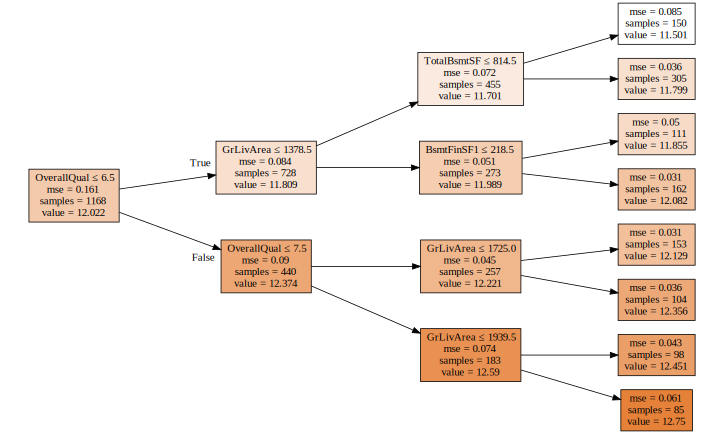

In [17]:
tree = model.estimators_[0] # Get the first and only estimator (tree) of the model
draw_tree(tree, x, precision=3)

In [18]:
nodes = get_nodes(tree, x)

Let's walk through what's the tree has _learned_.
<hr>

1. First, it's chosen the {{nodes[0].q}} column.

2. Now, it asks: "Which are the points where {{nodes[0].q}} is less than or equal to {{nodes[0].t}}?"

3. It seperates the dataset into these two subsets.

4. For the first subset ({{nodes[0].q}} $\leq$ {{nodes[0].t}}), it then repeats steps 1-3 like so:

 * It choses the {{nodes[1].q}} column.
 
 * It asks: "Which are the points where {{nodes[1].q}} is less than or equal to {{nodes[1].t}}?"
 
 * It seperates the dataset into these two further subsets.
 
5. Similarly, for the second subset ({{nodes[0].q}} $\geq$ {{nodes[0].t}}), it then repeats steps 1-3 like so:

 * It choses the {{nodes[2].q}} column.
 
 * It asks: "Which are the points where {{nodes[2].q}} is less than or equal to {{nodes[2].t}}?"
 
 * It seperates the dataset into these two further subsets.
 
We see that the entire tree is just a result of recursive applications of steps 1-3.

The tree can be, of course, built up until some terminating conditions like the maximum number of datapoints in the subset (after which it's further _indivisible_), the maximum depth etc.
<hr>

The question now, is this:

_"How's this tree built in the first place? Where does the data come in?
Where's the Machine Learning?"_

Let's think about the following points of the algorithm:
<br>

* We start with our _parent/root_ node which has the entire dataset.

* If we're at a given node, we'll **predict the mean** of it's associated dataset.

* With such a prediction, we'll also get an associated error (in this case, the RMSE).

* For each node, we might make a split at a certain point of a certain feature.
 This will divide the node's dataset across two _child_ nodes.
 
* We can produce children until some conditions are met (ensure maximum number of datapoints in the node etc.)

* After the tree is built, we make a prediction by passing each datapoint through the parent node, and following a path as appropriate until we reach a _terminal/leaf_ node.
 Our prediction will be the _value/mean_ of this node.
<br><br>

Now, it's only a question of how to split...
<br><br>
i.e. For each node, which column to chose and what value of that column to split at?
<hr>

Well, since we want the error to reduce,...

a well-meaning split should reduce the error.

But, we can't just add up the errors of the two children since they can contain a different number of datapoints each.

So, here, the first node has error {{f'{nodes[0].e:.2f}'}} and the second and third have errors {{f'{nodes[1].e:.2f}'}} and {{f'{nodes[2].e:.2f}'}} respectively. The addition ({{f'{(nodes[1].e + nodes[2].e):.2f}'}}), could conceivably be higher.
<br><br>
Instead, **we take the weighted average of the errors of the two children, weighted by their number of datapoints**.

So, here, _({{f'{nodes[1].s}'}} * {{f'{nodes[1].e:.2f}'}} + {{f'{nodes[2].s}'}} * {{f'{nodes[2].e:.2f}'}}) / ({{f'{nodes[1].s}'}} + {{f'{nodes[2].s}'}}) = {{f'{((nodes[1].s * nodes[1].e + nodes[2].s * nodes[2].e) / (nodes[1].s + nodes[2].s)):.2f}'}}_

which is less than the parent node's error.
<br><br>
**we literally take EVERY SINGLE COLUMN AND EVERY POSSIBLE VALUE TO SPLIT ON and try it out**.

Whichever combination reduces the error the most wins!

### Bigger Tree

In the previous example, we cut the tree of at the third layer via `max_depth=3`.

Now, let's build the tree fully.

In [20]:
model, metrics = train_model(RandomForestRegressor(1, bootstrap=False, n_jobs=-1),
                             metrics=True)

Training - r^2: 1.0000, RMSE: 0.0000
Validation - r^2: 0.7098, RMSE: 0.0444


<h5>Woah! Woah! Woah!</h5>

The training error is exactly 0!

i.e. Our single tree is enough to predict the _entire_ dataset correctly.
<br><br>
Of course, this should be no surprise if we think about it.

The tree continues splitting and growing until the leaf nodes have a single datapoint (or all datapoints have the same value).

So, all the leaf nodes in this tree have precisely 0 error!
<hr>
Unfortunately, though, this single tree is not the ultimate terminator AI which can predict the future because it overfits...
<br><br>
badly.
<br><br>
(Validation $R^2$ {{f'{metrics[1][0]:.2f}'}} as against a perfect training $R^2$ of 1)

Warning: Life-lesson follows
---------------------------------------------
This sort of extreme overfitting is because, in it's quest for absolute perfection and getting every single thing exactly right, the model fit the _noise_ in the data.

That's right folks. The world isn't perfect. It's a cold world out there. People are wrong all the time. The data isn't 100% foolproof and so should'nt our models be.

The little mistakes in what we know about our world can make us see it for what it isn't.

Like the proverbial Blind Men and the Elephant.

![blindmenelephant](assets/elephant.jpg)



We need the all the men. Different points of view.
<br><br>
We need an **ensemble**.

## Bagging

We train 10 trees on the model and then average their predictions.

If the trees are not _correlated_ to each other, then their individual errors should cancel each other, much like the blind men above.

In [21]:
model = train_model(RandomForestRegressor(10, bootstrap=False, n_jobs=-1))

Training - r^2: 1.0000, RMSE: 0.0000
Validation - r^2: 0.7349, RMSE: 0.0406


Slightly better.

But we're missing a crucial piece of the puzzle...
<br><br>
**Bootstrapping**

Imagine that the datapoints are little balls placed inside a bag.

Suppose there's a 10 of them.

Ordinarily, we would take these balls one by one and keep them in our parent node.

Instead, here, we take a ball, and keep _a copy_ of the ball in our parent node and put it back.

This way, we get 10 balls in our root node as before, but now they are copies and more than one copy of a ball may be present.

For example, take a set of these 10 numbers/datapoints: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Without bootstrapping, ordinarily, our root node will contain these 10 numbers as is.

With bootstrapping, we sample 10 items from this set _with replacement_:

(0, 5, 3, 5, 7, 6, 2, 4, 8, 1)
<br><br>
Notice that 5 has appeared twice, and that's okay.

The huge upside with this technique is that each tree is now _seeing a different dataset_, virtually.

This means that there's less _correlation_ between the trees.

So, without bootstrapping, it was like the blind men were all touching at the elephant's tail and said it was a rope.

Now, they are at different angles, and have something different to add.
<br><br>
Let's try it out

In [22]:
model = train_model(RandomForestRegressor(10, n_jobs=-1))

Training - r^2: 0.9756, RMSE: 0.0039
Validation - r^2: 0.8217, RMSE: 0.0273


There we go!

An small step for man but a giant leap for mankind.

Let's take a look at the individual predictions for the 10 trees.

In [24]:
preds = np.stack([tree.predict(x_val) for tree in model.estimators_])[:, 0]
preds, preds.mean(), y_val[0]

(array([11.8494 , 12.13886, 11.82408, 12.10071, 12.38422, 12.24961, 12.05815, 12.36734, 12.25486, 12.51356]),
 12.174079686292355,
 12.367340793126296)

Some predictions are lower than the true value while some are higher.
Which is what we need.

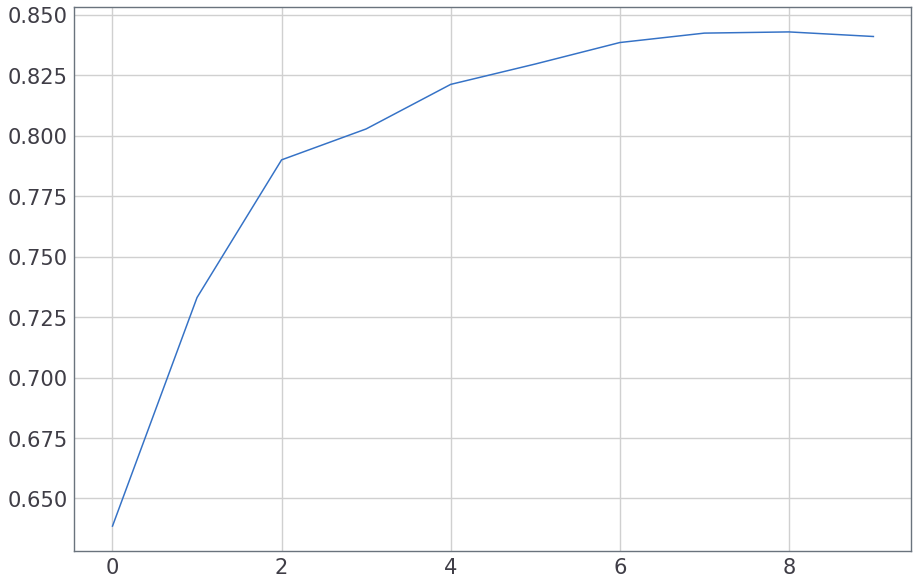

In [28]:
plot([metrics.r2_score(y_val, np.mean(preds[:i+1], axis=0)) for i in range(10)])

In the plot above, we see that as we consider more trees, the $R^2$ goes up.

After a certain point though, returns diminish.

## More Trees

Let's successively try more trees like above.

In [34]:
model = train_model(RandomForestRegressor(20, n_jobs=-1))

Training - r^2: 0.9803, RMSE: 0.0032
Validation - r^2: 0.8549, RMSE: 0.0222


In [35]:
model = train_model(RandomForestRegressor(40, n_jobs=-1))

Training - r^2: 0.9811, RMSE: 0.0030
Validation - r^2: 0.8633, RMSE: 0.0209


In [36]:
model = train_model(RandomForestRegressor(80, n_jobs=-1))

Training - r^2: 0.9819, RMSE: 0.0029
Validation - r^2: 0.8576, RMSE: 0.0218


## Out-Of-Bag Error

We also have a clever technique called the Out-Of-Bag score.

For each tree, we run predictions on the columns of the dataset that were not included in it's training.

So, in some sense, it's a psuedo-validation set.

In [40]:
model = train_model(RandomForestRegressor(40, n_jobs=-1, oob_score=True))

Training - r^2: 0.9810, RMSE: 0.0031
Validation - r^2: 0.8504, RMSE: 0.0229
oob: 0.8604


## Other Hyperparameters

The `min_samples_leaf` value dictates how many samples are _atomic_/indivisible. As soon as a node has these many samples or less, it's declared a leaf node.

Usually, this is set to $1$.

Each time we double it, the number of leaf nodes halves and the depth of the tree decrements.
We get a more stable average.

This leads to a less predictive tree but the trees are less correleated.

In [41]:
model = train_model(RandomForestRegressor(40, min_samples_leaf=3, n_jobs=-1, oob_score=True))

Training - r^2: 0.9638, RMSE: 0.0058
Validation - r^2: 0.8476, RMSE: 0.0233
oob: 0.8573


`max_features` dictates the number of features to search for in finding a split.

If not $1$ (default), it randomly selects those many features and finds the best split among those features.

Consider a scenario where some single feature turns out to be super predictive and all the trees of our forest initially split on that column. That's going to be a boring forest, all right.

Instead, this bit of randomness allows each tree to explore and learn something different and have an alternative perspective on <del>life</del> data.

In [43]:
model = train_model(RandomForestRegressor(40,  min_samples_leaf=3, n_jobs=-1,
                                          max_features=0.5, oob_score=True))

Training - r^2: 0.9639, RMSE: 0.0058
Validation - r^2: 0.8525, RMSE: 0.0226
oob: 0.8725


# Final Model

We'll just select the best model after tuning the above _hyperparameters_ and save it.

In [47]:
model = train_model(RandomForestRegressor(10,  min_samples_leaf=3,
                                          n_jobs=-1, max_features=0.5))

Training - r^2: 0.9551, RMSE: 0.0072
Validation - r^2: 0.8443, RMSE: 0.0238


In [48]:
joblib.dump(model, DIR_CHECKPOINTS / 'model.p') # Save Model

['/home/vaisakh/Kaggle/house-prices/Checkpoints/model.p']